In [1]:
from IPython.display import display, Math, Latex

### 1) Geometric Entanglement vs argument($f$) of Werner state plot for two-qubit Werner State

- For this plot I have used the definitions and analytical solution of geometric entanglement given in papers [https://www.nature.com/articles/s41598-020-68979-z][https://arxiv.org/pdf/quant-ph/0307219.pdf].
- Following the papers above, the definition of:
    - Werner State:
$$\rho_W(f) = \frac{d^2-fd}{d^4-d^2}\mathbb{I}_4+\frac{fd^2-d}{d^4-d^2}\mathbb{F}_4,$$ subject to conditions $f = Tr(\rho_W F)$ and $Tr(\rho_W) =1$
where $\mathbb{I}_4$ is identity operator in 2 qubits and $\mathbb{F}$ is an operator that flip the system states. For bipartite system, $\mathbb{F} = \sum_i,j |ij\rangle\langle ji|$
    - The analytical solution for Geometry of Entanglement for two-qubit Werner state:
$$ \begin{equation}
      E_G(\rho_W (f)) = 
    \begin{cases}
    \frac{1}{2}(1-\sqrt{1-f^2}) & \text{ , for } f \leq 0\\
    0 & \text{, otherwise}\\
        \end{cases}
    \end{equation}$$
    
    
- The derivations for these are not done as it is believed to be beyond the scope of this assignment.
- Apart from this numerical solutions have also been proposed in papers, [https://www.nature.com/articles/s41598-020-68979-z], [https://www.mdpi.com/2304-6732/9/10/741] and [https://arxiv.org/pdf/2104.07653.pdf]. In numerical solutions, they : 
    - take the above defined Werner state and perform the SIC-POVM measurement to recreate the Werner state $\rho'$, (quantum tomography).
    - After that they obtain the Fidelity using $F(\rho,\rho_W{f}) =[Tr(\sqrt{\sqrt{\rho'}\rho_W\sqrt{\rho'}})]^2$
    - Finally, they compute the geometric entanglement.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def E_G(f):
    if f<0:
        return 1/2*(1-np.sqrt(1-(f**2)))
    else:
        return 0 

In [4]:
f_vals= np.linspace(-1,1,100)
E_Gs = []
for i in range(100):
    E_Gs.append(E_G(f_vals[i]))

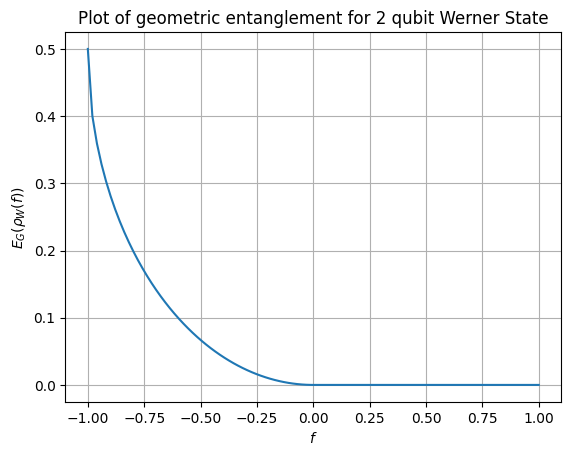

In [14]:
plt.plot(f_vals,E_Gs)
plt.ylabel(r"$E_G(\rho_W(f))$")
plt.xlabel(r"$f$")
plt.grid()
plt.title("Plot of geometric entanglement for 2 qubit Werner State")
plt.savefig("Geometric entanglement.png")

### 2) Entanglement of Formation vs argument($f$) of Werner state plot for two-qubit Werner State

- For this plot I have used the definitions and analytical solution of entanglement of formation given in papers [https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.80.2245],[https://arxiv.org/pdf/1802.05877.pdf]. I have mainly followed the second paper as it is simpler and it uses the work from the former paper.

- Following the papers above, the definition of:
    - Werner State for 2 qubit:
$$\rho_W(f) = \frac{1-f}{4}\mathbb{I}_4+\frac{f}{2}\mathbb{F}_4,$$
where $\mathbb{I}_4$ and $\mathbb{F}$ has same meaning as above and $f \in [-1,1/3]$.
    - The analytical solution for Entanglement of formation for two-qubit Werner state:
$$ \begin{equation}
      EoF_W(\rho (f)) = 
    \begin{cases}
    H_2\big(\frac{2-\sqrt{4-(3p+1)^2}}{4}\big) & \text{ , for } -1 \leq f \leq -\frac{1}{3}\\
    0 & \text{, for} \frac{-1}{3} \leq f \leq \frac{1}{3}\\
        \end{cases}
    \end{equation}$$
    where $H_2(x) = -x\log_2(x)-(1-x)\log_2(1-x)$  is the Shannon binary entropy function
    
- The derivations for these  are not done as it is believed to be beyond the scope of this assignment.
- In paper [https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.80.2245] the EoF is proposed as : 
    - Compute the eigenvalues($\lambda_is$) of matrix $\sqrt{\sqrt{\rho}\tilde{\rho}\sqrt{\rho}}$ in decreasing order as $\lambda_1 > \lambda_2>\lambda_3>\lambda_4$, where $\tilde{\rho} = (\sigma_y\otimes\sigma_y)\rho^*(\sigma_y\otimes\sigma_y)$. $\rho$ is the two-qubit Werner state and $\rho^*$ is the complex conjugate of $\rho$.
    - After that they obtain the concurrence $C = \max\{0,\lambda_1-\lambda_2-\lambda_3-\lambda_4\}$ and $\mathcal{E}(C) =H_2(\frac{1+\sqrt(1-C^2)}{2})$ where $H_2$ is again the same Shannon binary entropy function.
    - Finally, they compute the $EoF(\rho) = \mathcal(E)(C)$.

In [10]:
def H_2(x):
    return ((-x*np.log2(x))-((1-x)*np.log2(1-x)))

def EoF(f):
    if f>=-1 and f<-1/3:
        return H_2((2-np.sqrt(4-(3*f+1)**2))/4)
    elif f>=-1/3 and f<=1/3:
        return 0

In [12]:
f2_vals= np.linspace(-1,1/3,100)
EoFs = []
for i in range(100):
    EoFs.append(EoF(f2_vals[i]))

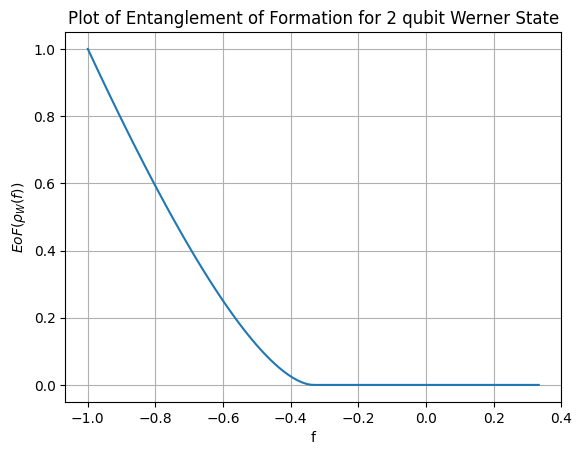

In [15]:
plt.plot(f2_vals,EoFs)
plt.ylabel(r"$EoF(\rho_W(f))$")
plt.xlabel(r"f")
plt.grid()
plt.title("Plot of Entanglement of Formation for 2 qubit Werner State")
plt.savefig("EoF.png")